In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_csv("linear_data.csv")

In [8]:
df.head()

,x1,x2,x3,y
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [9]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, -1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
## Residual
y_pred = model.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
print("Coeeficiants", model.coef_)
print("Intercept", model.intercept_)
residual = y_test - y_pred

MAE 16.468546338798276
MSE 390.45148073756224
R2 Score 0.9568293890166812
Coeeficiants [72.74877711 -0.2771884  53.33861607]
Intercept 0.3580457374558734


In [15]:
####Linear Relationships

Text(0.5, 1.0, 'x3')

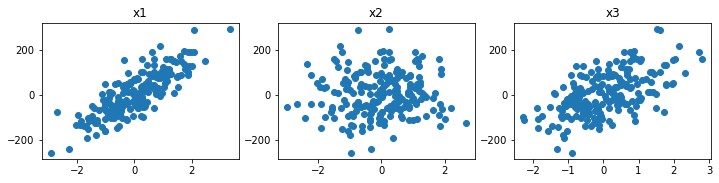

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols =3, figsize= (12, 2.5))
ax1.scatter(df['x1'], df['y'])
ax1.set_title("x1")
ax2.scatter(df['x2'], df['y'])
ax2.set_title("x2")
ax3.scatter(df['x3'], df['y'])
ax3.set_title("x3")

# Multicollinearity
###  vfi = 1, variables are not correlated
### vif = 1 and 5 variables are moderately correalted
###  vif greater than 5 variables are highly correlated.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [22]:
pd.DataFrame({'vif': vif}, index = df.columns[0:3]).T

,x1,x2,x3
vif,1.010326,1.009871,1.01395


## Another Technique

<AxesSubplot:>

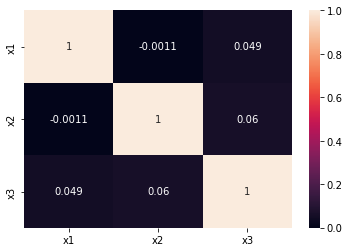

In [25]:
sns.heatmap(df.iloc[:, 0:3].corr(), annot = True)

# Normality of Residual

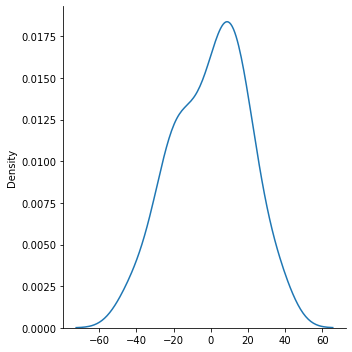

In [27]:
sns.displot(residual, kind = 'kde')

## QQ PLOT

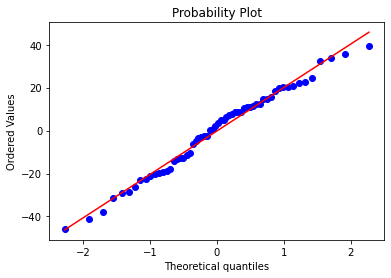

In [29]:
import scipy as sp
fig, ax = plt.subplots(figsize = (6,4))
sp.stats.probplot(residual, plot = ax, fit = True)

plt.show()

# Homoscedasticity

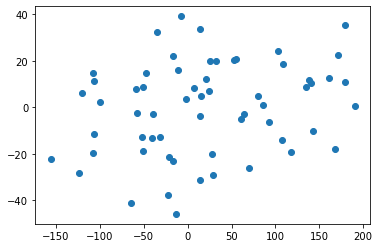

In [32]:
plt.scatter(y_pred, residual)

# AutoCorrelation

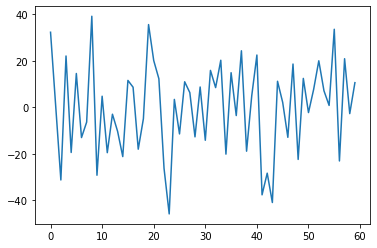

In [35]:
plt.plot(residual)